In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [31]:
def bin_spikes(spike_times,spike_clusters, bin_size = 10):

    # Using clusters._phy_annotation.npy obtain valid clusters (i.e. >= 2)
    # valid_clusters_idx = np.array(np.where(clusters_annotation>=2))[0]

    spike_time_cells = np.empty(1000, dtype=object) # Initalise empty object
    for i in (np.arange(len(np.unique(spike_clusters)))):
      # Create a spike time arrays, where each array in the array is a spike time of a cell
      spike_time_cells[i] = spike_times[(np.where(spike_clusters == i)[0])]

    # Bin spike times into 10ms intervals
    spike_time_binned = np.empty(len(np.unique(spike_clusters)), dtype=object) # Initalise empty object
    sum_spikes = np.empty(len(np.unique(spike_clusters)), dtype=object) # Initalise empty object

    for cell_num in np.arange(len(spike_time_cells)):
        spike_time_hist = np.histogram(spike_time_cells[cell_num],bins = np.arange(0,np.floor(spike_time_cells[cell_num][-1]),bin_size))
        spike_time_binned[cell_num] = spike_time_hist[0][1000:]
        sum_spikes[cell_num] = np.sum(spike_time_binned[cell_num])

    cell_spikes_max = np.argmax(sum_spikes) # cell with the maximum number of spikes for plotting purposes
    # Spike_time_binned returns binned spikes sorted into cells
    # Spike_time_cells returns UNbinned spikes sorted into cells
    # cell_spikes_max returns a single cell index that has the max number of spikes (i.e most active cell)
    return spike_time_binned

In [47]:
spks=np.load('Mgpt_AMPA_GABA_rec_NP.npy')*1000
spk_clusters=np.load('Mgpi_AMPA_GABA_rec_NP.npy')

In [48]:
spike_time_binned= bin_spikes(spks,spk_clusters, bin_size = 10)

In [49]:
def convert_for_pca(binned_spikes):
    spk_arr=[]
    for j in range(binned_spikes.shape[0]):
        spk_arr.append(list(binned_spikes[j])+[0]*(10000-binned_spikes[j].shape[0]))
    spk_arr=np.array(spk_arr).reshape(1000,-1)
    return spk_arr

In [50]:
spk_arr=convert_for_pca(spike_time_binned)

In [30]:
spks

array([    0.  ,     0.  ,     0.  , ..., 19999.55, 19999.6 , 19999.74])

In [51]:
pca=PCA(n_components=50)
pca.fit(spk_arr.T)
var_exp=pca.explained_variance_ratio_

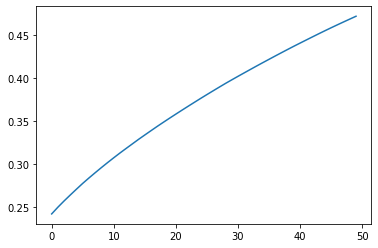

In [37]:
plt.plot(np.cumsum(var_exp))

In [52]:
spks=np.load('Mgpt_AMPA_GABA_rec_poisson.npy')*1000
spk_clusters=np.load('Mgpi_AMPA_GABA_rec_poisson.npy')

In [53]:
spike_time_binned= bin_spikes(spks,spk_clusters, bin_size = 10)

In [54]:
spk_arr=convert_for_pca(spike_time_binned)

In [55]:
pca=PCA(n_components=50)
pca.fit(spk_arr.T)
var_exp_poisson=pca.explained_variance_ratio_

(1000, 10000)

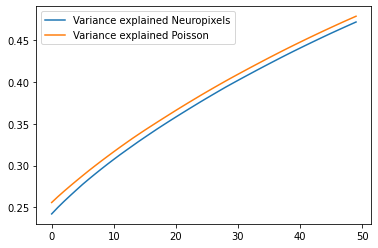

In [57]:
plt.plot(np.cumsum(var_exp),label='Variance explained Neuropixels')
plt.plot(np.cumsum(var_exp_poisson),label='Variance explained Poisson')
plt.legend()